# Week 4 Lab and Activity

# TASK-2B

Information Gain for each attribute:
Outlook: 0.2467
Temperature: 0.0292
Humidity: 0.1518
Windy: 0.0481


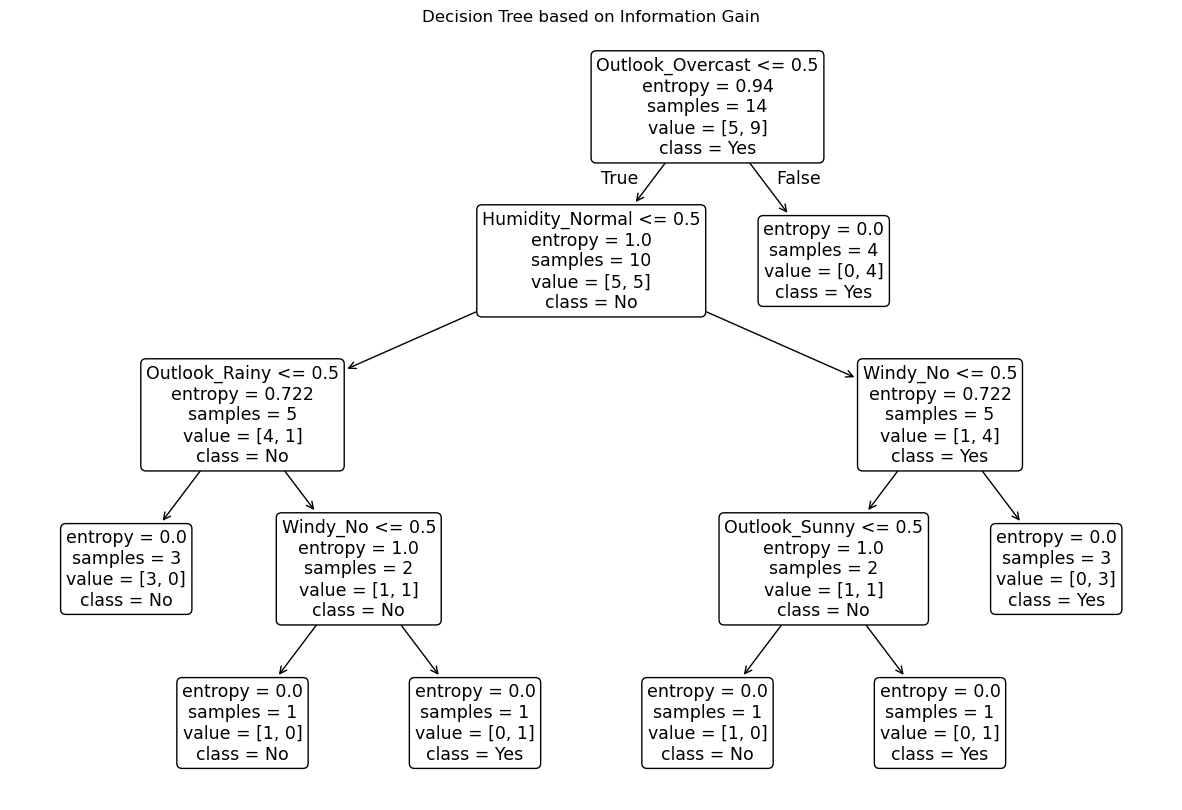

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Load the dataset (update the path to your local file)
df = pd.read_csv('/Users/ananyasmaranikadivendi/Downloads/tennis.csv')

# Set the target column to 'Play'
target_attribute = 'Play'

# Function to calculate entropy
def entropy(column):
    values, counts = np.unique(column, return_counts=True)
    probabilities = counts / len(column)
    entropy_value = -sum(probabilities * np.log2(probabilities)) if len(probabilities) > 1 else 0
    return entropy_value

# Function to calculate Information Gain
def information_gain(df, split_attribute, target_attribute):
    total_entropy = entropy(df[target_attribute])
    values, counts = np.unique(df[split_attribute], return_counts=True)
    
    # Calculate weighted entropy
    weighted_entropy = sum((counts[i] / sum(counts)) * entropy(df[df[split_attribute] == v][target_attribute])
                           for i, v in enumerate(values))
    
    # Information Gain
    info_gain = total_entropy - weighted_entropy
    return info_gain

# Compute Information Gain for each attribute and print the result
print("Information Gain for each attribute:")
for column in df.columns:
    if column != target_attribute:
        ig = information_gain(df, column, target_attribute)
        print(f"{column}: {ig:.4f}")

# Encode categorical features to numeric using one-hot encoding
df_encoded = pd.get_dummies(df.drop(target_attribute, axis=1))

# Convert target column 'Play' to binary values (1 for 'Yes', 0 for 'No')
y = df[target_attribute].apply(lambda x: 1 if x == 'Yes' else 0)

# Train the decision tree classifier using entropy criterion
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(df_encoded, y)

# Visualization using matplotlib
plt.figure(figsize=(15, 10))
tree.plot_tree(clf, feature_names=df_encoded.columns, class_names=['No', 'Yes'], filled=False, rounded=True)
plt.title("Decision Tree based on Information Gain")
plt.axis('off')  # Turn off the axis for a cleaner look
plt.show()

# TASK-3B

True Positives (TP): 4
True Negatives (TN): 3
False Positives (FP): 2
False Negatives (FN): 1
Accuracy: 0.70
Precision: 0.67
Recall (TPR): 0.80
False Positive Rate (FPR): 0.40
Specificity: 0.60
Negative Predictive Value (NPV): 0.75


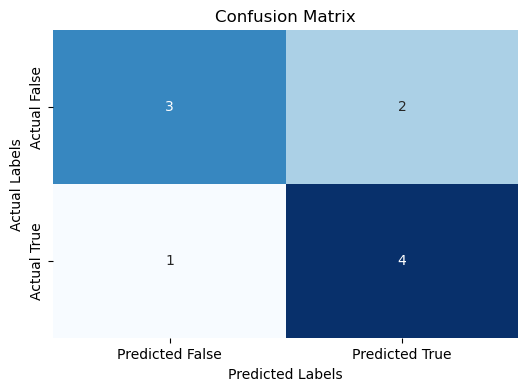

In [41]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Given true and predicted labels
true_labels = [1, 0, 1, 0, 1, 1, 0, 0, 1, 0]
predicted_labels = [1, 1, 1, 0, 1, 0, 0, 1, 1, 0]

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
tpr = recall  # True Positive Rate (same as recall)
fpr = fp / (fp + tn)  # False Positive Rate
specificity = tn / (tn + fp)  # Specificity
npv = tn / (tn + fn)  # Negative Predictive Value

# Print calculated metrics
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall (TPR): {tpr:.2f}")
print(f"False Positive Rate (FPR): {fpr:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"Negative Predictive Value (NPV): {npv:.2f}")

# Visualize confusion matrix with labels and actual values
plt.figure(figsize=(6, 4))
ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
                 xticklabels=["Predicted False", "Predicted True"], 
                 yticklabels=["Actual False", "Actual True"])

# Add title and labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()